Test Name | Description
--- | ---
Majors1H_1 | Test majors on 1HR

In [3]:
import pytools.leantools as lt
import pandas as pd
import os
from IPython.display import display

In [34]:
script_dir = os.path.abspath('') #<-- absolute dir the script is in
result_dir = os.path.join (script_dir, "../results/stddevrevert/backtest1")
test_name="Majors1H_1"
algo_result_filepath = os.path.join(result_dir, f'{test_name}.json')
analysis_data_filepath = os.path.join(result_dir, f'{test_name}-analysis_data.json')
SYMBOLS = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD', 'NZDUSD']
analysis_file_suffix = "-analysis_data"


In [9]:
# Print high level stats

stat_columns = ['TradeStats.TotalNumberOfTrades', 
             'TradeStats.ProfitLossRatio', 
             'PortfolioStats.AverageWinRate', 
             'PortfolioStats.AverageLossRate',
             'PortfolioStats.WinRate',
             'PortfolioStats.Drawdown',
            'PortfolioStats.TotalNetProfit']

def format_stats(stats_df):
    result = stats_df.transpose()
    result.loc['PortfolioStats.AverageWinRate'] = result.loc['PortfolioStats.AverageWinRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.AverageLossRate'] = result.loc['PortfolioStats.AverageLossRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.WinRate'] = result.loc['PortfolioStats.WinRate'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.Drawdown'] = result.loc['PortfolioStats.Drawdown'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.TotalNetProfit'] = result.loc['PortfolioStats.TotalNetProfit'].apply('{:,.2%}'.format)
    return result

def get_stats(symbols, timeframe):
    stats_list = []
    for s in symbols:
        name = f'{s}-{timeframe}'
        path = os.path.join(result_dir, f'{name}.json')
        stats = lt.get_trade_statistics(path)
        stats = stats[stat_columns]
        stats.rename(index={0:name}, inplace=True)
        stats_list.append(stats)

stats = lt.get_trade_statistics(algo_result_filepath)
stats = stats[stat_columns]
format_stats(stats)


,0
TradeStats.TotalNumberOfTrades,1924
TradeStats.ProfitLossRatio,0.8035
PortfolioStats.AverageWinRate,0.22%
PortfolioStats.AverageLossRate,-0.28%
PortfolioStats.WinRate,44.9%
PortfolioStats.Drawdown,65.6%
PortfolioStats.TotalNetProfit,-65.01%


https://stackoverflow.com/questions/38107304/pandas-changing-a-specific-row-to-percentages

In [10]:
bar_data_df = lt.get_bar_data_df(analysis_data_filepath)
bar_data_df['ratioTop'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['top'], axis = 1)
bar_data_df['ratioBody'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['body'], axis = 1)
bar_data_df['ratioBottom'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['bottom'], axis = 1)

In [11]:
bar_data_df

,,BBMid,BBUpper,BBLower,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom
Symbol,Time,,,,,,,,,,,,
AUDUSD,2019-01-02 19:00:00+00:00,0.7011,0.7049,0.6973,13.5,0.699265,0.699890,0.698825,0.699795,1.5,0.089202,0.497653,0.413146
EURUSD,2019-01-02 19:00:00+00:00,1.1415,1.1542,1.1287,19.9,1.132805,1.134435,1.132500,1.134375,1.3,0.031008,0.811370,0.157623
GBPUSD,2019-01-02 19:00:00+00:00,1.2677,1.2836,1.2519,23.4,1.259235,1.261270,1.258825,1.261245,2.3,0.010225,0.822086,0.167689
NZDUSD,2019-01-02 19:00:00+00:00,0.6690,0.6740,0.6639,11.8,0.665790,0.666045,0.665685,0.666025,1.9,0.055556,0.652778,0.291667
USDCAD,2019-01-02 19:00:00+00:00,1.3619,1.3678,1.3559,25.1,1.358660,1.359690,1.358385,1.358660,1.8,0.789272,0.000000,0.210728
...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBPUSD,2019-12-31 21:00:00+00:00,1.3191,1.3329,1.3054,21.8,1.324585,1.326845,1.324340,1.326060,6.0,0.313373,0.588822,0.097804
NZDUSD,2019-12-31 21:00:00+00:00,0.6736,0.6754,0.6718,7.7,0.673240,0.673270,0.672785,0.672915,3.5,0.061856,0.670103,0.268041
USDCAD,2019-12-31 21:00:00+00:00,1.3014,1.3091,1.2936,13.4,1.298525,1.299365,1.298195,1.299045,4.5,0.273504,0.444444,0.282051


In [12]:
closed_trades = lt.get_closed_trades_df(algo_result_filepath).drop(columns=['Direction', 'TotalFees', 'MAE', 'MFE', 'Symbol.ID', 'Symbol.Permtick'])
#closed_trades

Grab the trade signals

In [27]:
def get_r_multiple(row):
    if row.slPips != 0:
        return row.plPips / row.slPips
    else:
        return 0

trade_setups_df = lt.get_trade_setups_df(analysis_data_filepath)
# calculate some additional data
trade_setups_df['year'] = trade_setups_df.apply(lambda row: row.name.year, axis = 1)
trade_setups_df['weekday'] = trade_setups_df.apply(lambda row: row.name.weekday(), axis = 1)
trade_setups_df['hour'] = trade_setups_df.apply(lambda row: row.name.hour, axis = 1)
trade_setups_df['RMultiple'] = trade_setups_df.apply(get_r_multiple, axis = 1)


#pd.set_option('display.max_rows', 500)
#display(trade_setups_df)
trade_setups_df.reset_index(inplace=True)
#trade_setups_df.style
#trade_setups_df.to_csv("test.csv")
#pd.reset_option('display.max_rows')

In [15]:
# Show R multiple grouped by symbol
r_by_symbol = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['symbol']).sum()
r_by_symbol.sort_values('RMultiple').style.hide_columns(['year', 'tradeIndex'])

,entryPrice,slPrice,tpPrice,fillPrice,canceled,slPips,tpPips,plPips,weekday,RMultiple
symbol,,,,,,,,,,
USDCHF,295.430870,295.425140,295.436650,295.429640,False,2878.100000,2877.800000,-817.100000,613,-89.967044
GBPUSD,457.512010,457.513070,457.510760,457.513650,False,6495.000000,6495.500000,-952.200000,756,-75.368247
USDCAD,380.678850,380.673000,380.684510,380.679000,False,3578.500000,3578.000000,-913.200000,593,-71.248028
EURUSD,340.834540,340.805020,340.864230,340.837220,False,3239.600000,3237.900000,-604.500000,657,-63.627641
NZDUSD,145.265710,145.258100,145.273400,145.266490,False,2092.100000,2092.500000,-517.200000,468,-59.133224
AUDUSD,145.448930,145.432980,145.464920,145.450210,False,1956.700000,1956.900000,-313.800000,450,-33.678734
USDJPY,26903.657000,26901.197000,26906.106000,26903.843000,False,2809.200000,2809.700000,37.100000,533,-30.160801


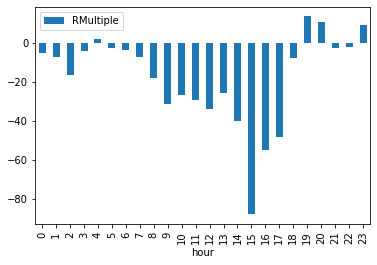

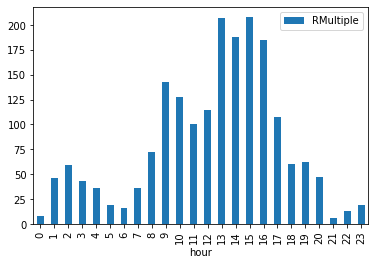

In [33]:
sum_r_group = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['year','weekday'])[['RMultiple']].sum()
sum_r_group.style

# Plot RMultiple by hour
sum_r_group = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['hour'])[['RMultiple']].sum()
#sum_r_group.style
sum_r_group.plot(kind='bar')

# Plot number of trades by hour
trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['hour'])[['RMultiple']].count().plot(kind='bar')


#sum_r_group.plot(kind='bar', figsize=(20,5))

#pd.set_option('display.max_rows', 500)

#pd.reset_option('display.max_rows')

In [18]:
# Combine signal data with closed trade data
merged_trade_data = trade_setups_df.join(closed_trades, on='tradeIndex')
#merged_trade_data.style

tmp_data = merged_trade_data[['BarTime', 'symbol', 'direction', 'RMultiple', 'tradeIndex']].sort_values(by=['BarTime', 'symbol'])
def get_result_word(row):
    if row.tradeIndex == -1:
        return "NoEntry"
    elif row.RMultiple > 0:
        return "Win"
    elif row.RMultiple < 0:
        return "Lose"
    else:
        return "ERROR"
tmp_data['Result'] = tmp_data.apply(get_result_word, axis=1)
#tmp_data.style
#tmp_data.to_csv('tmp_data.csv')

In [19]:
merged_trade_data.reset_index(inplace=True)
merged_trade_data.set_index(['symbol', 'BarTime'])

index direction  entryPrice    slPrice  \
symbol BarTime                                                             
AUDUSD 2019-01-02 23:00:00+00:00      0       Buy     0.68626    0.68318   
USDJPY 2019-01-02 23:00:00+00:00      1       Buy   104.81900  104.34600   
NZDUSD 2019-01-02 23:00:00+00:00      2       Buy     0.66134    0.65934   
USDCAD 2019-01-03 14:00:00+00:00      3       Buy     1.35374    1.35147   
       2019-01-03 15:00:00+00:00      4       Buy     1.35224    1.34996   
...                                 ...       ...         ...        ...   
EURUSD 2019-12-31 14:00:00+00:00   2200      Sell     1.12380    1.12464   
USDCHF 2019-12-31 14:00:00+00:00   2201       Buy     0.96496    0.96400   
GBPUSD 2019-12-31 12:00:00+00:00   2202      Sell     1.32096    1.32290   
AUDUSD 2019-12-31 14:00:00+00:00   2203      Sell     0.70244    0.70302   
USDCAD 2019-12-31 16:00:00+00:00   2204       Buy     1.29704    1.29582   

                                    tpPrice             entryTime  fillPrice  \
symbol BarTime                                                                 
AUDUSD 2019-01-02 23:00:00+00:00    0.68935  2019-01-02T23:00:00Z    0.68681   
USDJPY 2019-01-02 23:00:00+00:00  105.29200  2019-01-02T23:00:00Z  104.86900   
NZDUSD 2019-01-02 23:00:00+00:00    0.66334  2019-01-02T23:00:00Z    0.66234   
USDCAD 2019-01-03 14:00:00+00:00    1.35602  2019-01-03T14:00:00Z    1.35384   
       2019-01-03 15:00:00+00:00    1.35453  2019-01-03T15:00:00Z    1.35258   
...                                     ...                   ...        ...   
EURUSD 2019-12-31 14:00:00+00:00    1.12296  2019-12-31T14:00:00Z    1.12374   
USDCHF 2019-12-31 14:00:00+00:00    0.96593  2019-12-31T14:00:00Z    0.96504   
GBPUSD 2019-12-31 12:00:00+00:00    1.31902  2019-12-31T12:00:00Z    1.32086   
AUDUSD 2019-12-31 14:00:00+00:00    0.70186  2019-12-31T14:00:00Z    0.70238   
USDCAD 2019-12-31 16:00:00+00:00    1.29826  2019-12-31T16:00:00Z    1.29713   

                                             closeTime  canceled  slPips  ...  \
symbol BarTime                                                            ...   
AUDUSD 2019-01-02 23:00:00+00:00  2019-01-02T23:04:00Z     False    30.8  ...   
USDJPY 2019-01-02 23:00:00+00:00  2019-01-02T23:05:00Z     False    47.3  ...   
NZDUSD 2019-01-02 23:00:00+00:00  2019-01-02T23:07:00Z     False    20.0  ...   
USDCAD 2019-01-03 14:00:00+00:00  2019-01-03T14:20:00Z     False    22.7  ...   
       2019-01-03 15:00:00+00:00  2019-01-03T16:10:00Z     False    22.8  ...   
...                                                ...       ...     ...  ...   
EURUSD 2019-12-31 14:00:00+00:00  2019-12-31T14:34:00Z     False     8.4  ...   
USDCHF 2019-12-31 14:00:00+00:00  2019-12-31T14:36:00Z     False     9.6  ...   
GBPUSD 2019-12-31 12:00:00+00:00  2019-12-31T15:09:00Z     False    19.4  ...   
AUDUSD 2019-12-31 14:00:00+00:00  2019-12-31T15:58:00Z     False     5.8  ...   
USDCAD 2019-12-31 16:00:00+00:00  2019-12-31T16:37:00Z     False    12.2  ...   

                                  RMultiple             EntryTime  EntryPrice  \
symbol BarTime                                                                  
AUDUSD 2019-01-02 23:00:00+00:00   0.824675  2019-01-02T23:00:00Z     0.68681   
USDJPY 2019-01-02 23:00:00+00:00   5.084567  2019-01-02T23:00:00Z   104.86900   
NZDUSD 2019-01-02 23:00:00+00:00   0.500000  2019-01-02T23:00:00Z     0.66234   
USDCAD 2019-01-03 14:00:00+00:00  -1.044053  2019-01-03T14:00:00Z     1.35384   
       2019-01-03 15:00:00+00:00  -1.324561  2019-01-03T15:00:00Z     1.35258   
...                                     ...                   ...         ...   
EURUSD 2019-12-31 14:00:00+00:00   0.928571  2019-12-31T14:00:00Z     1.12374   
USDCHF 2019-12-31 14:00:00+00:00   0.927083  2019-12-31T14:00:00Z     0.96504   
GBPUSD 2019-12-31 12:00:00+00:00  -1.134021  2019-12-31T12:00:00Z     1.32086   
AUDUSD 2019-12-31 14:00:00+00:00  -1.155172  2019-12-31T14:

https://pandas.pydata.org/docs/user_guide/merging.html#timeseries-friendly-merging

In [22]:
# Merge trade data with bar data

# only grab attempted trades
attempted_trades = merged_trade_data[(merged_trade_data['slPips'] > 0)]
merged_setups = pd.merge(attempted_trades, bar_data_df, left_on=['symbol', 'BarTime'], right_on=['Symbol','Time'])
#merged_setups = pd.merge(attempted_trades, bar_data_df, left_index=True, right_on=['Symbol','Time'])

merged_setups['range'] = merged_setups.apply(lambda row: (row.H - row.L) / 0.0001, axis = 1)
merged_setups['rangeAtrRatio'] = merged_setups.apply(lambda row: row.range / row.atrPips, axis = 1)

# Calculate direction wick
def get_direction_wick(row):
    if row.direction == 'Sell':
        return row.ratioBottom
    else:
        return row.ratioTop
merged_setups['directionWickRatio'] = merged_setups.apply(get_direction_wick, axis=1)

# Calculate middle bb distance
def get_midbb_dist(row):
    if row.direction == 'Sell':
        return lt.invLerp(row.BBUpper, row.BBMid, row.C)
    else:
        return lt.invLerp(row.BBLower, row.BBMid, row.C)
    
#merged_setups['bbMidDist'] = merged_setups.apply(get_midbb_dist, axis=1)

#merged_setups['bodyAtrRatio'] = merged_setups.apply(lambda row: (abs(row.O - row.C) / lt.getPipSize(row.symbol)) / row.atrPips, axis=1)

def color_returns(val):
    if val <= 0:
        return 'color: red'
    else:
        return 'color: green'

merged_setups.reset_index()
merged_setups.set_index(['symbol', 'BarTime'])
#merged_setups.style.applymap(color_returns, subset=['RMultiple'])    
#merged_setups.style.hide_columns(['year', 'EntryTime', 'Quantity'])

#formatted = merged_setups[['symbol', 'RMultiple', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom', 'directionWickRatio']]
#formatted.style.applymap(color_returns, subset=['RMultiple'])

#merged_setups['spreadAtrRatio'] = merged_setups.apply(lambda row: row.spread / row.atrPips, axis=1)
#merged_setups[merged_setups['spread'] >= merged_setups['slPips']][['BarTime', 'symbol', 'atrPips', 'spread', 'slPips', 'RMultiple', 'spreadAtrRatio']].style
merged_setups.apply(lambda row: row.slPips - row.spread, axis=1).describe()

count    1924.000000
mean       10.358004
std         5.022296
min        -2.900000
25%         7.200000
50%         9.400000
75%        12.100000
max        51.600000
dtype: float64

In [63]:
#merged_closed_trades = merged_setups
merged_setups = merged_setups[(merged_setups['tradeIndex'] >= 0)]
winning_trades = merged_setups[(merged_setups['plPips'] > 0)]
losing_trades = merged_setups[(merged_setups['plPips'] < 0)]
describeColumns = ['slPips', 'tpPips', 'atrPips', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom']
winning_trades_desc = winning_trades.describe()[describeColumns]
losing_trades_desc = losing_trades.describe()[describeColumns]

#winning_trades[winning_trades['rangeAtrRatio'] < 1].describe()
#losing_trades[losing_trades['rangeAtrRatio'] < 1].describe()
#print(len(winning_trades))
#print(len(losing_trades))
#merged_setups[(merged_setups['RMultiple'] > -0.5) & (merged_setups['RMultiple'] < 0.5)]

,index,entryPrice,slPrice,tpPrice,fillPrice,slPips,tpPips,plPips,tradeIndex,year,...,H,L,C,spread,ratioTop,ratioBody,ratioBottom,range,rangeAtrRatio,directionWickRatio
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.00000,233.000000,233.0,...,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,1079.871245,0.969263,0.969293,0.969234,0.969261,11.699571,11.698283,10.91073,937.291845,2019.0,...,0.969691,0.968825,0.969232,1.621459,0.305155,0.414621,0.280224,8.654936,0.761324,0.281271
std,666.815496,0.259327,0.259502,0.259158,0.259316,6.102413,6.098176,5.82909,581.364107,0.0,...,0.259381,0.259166,0.259227,0.862066,0.233039,0.250363,0.203943,4.358670,0.163322,0.209391
min,40.000000,0.624320,0.623430,0.625210,0.624400,4.800000,4.700000,4.10000,35.000000,2019.0,...,0.624525,0.623755,0.623990,1.000000,0.000000,0.000000,0.000000,2.300000,0.328571,0.000000
25%,399.000000,0.687320,0.687670,0.686790,0.687400,8.300000,8.400000,7.60000,347.000000,2019.0,...,0.687965,0.687185,0.687885,1.300000,0.102804,0.217391,0.120000,5.800000,0.642857,0.093333
50%,1094.000000,0.997720,0.998070,0.996780,0.997640,10.200000,10.300000,9.50000,943.000000,2019.0,...,0.997745,0.997170,0.997435,1.500000,0.270270,0.405000,0.252033,7.750000,0.779874,0.247148
75%,1689.000000,1.214900,1.212900,1.216910,1.215000,12.600000,12.600000,11.90000,1469.000000,2019.0,...,1.215615,1.214355,1.215395,1.700000,0.465909,0.595588,0.428571,10.050000,0.896552,0.431579
max,2173.000000,1.346340,1.351620,1.347630,1.346420,55.000000,55.000000,52.20000,1897.000000,2019.0,...,1.348360,1.345960,1.347355,10.000000,0.893939,1.000000,0.939394,32.000000,0.996032,0.852632


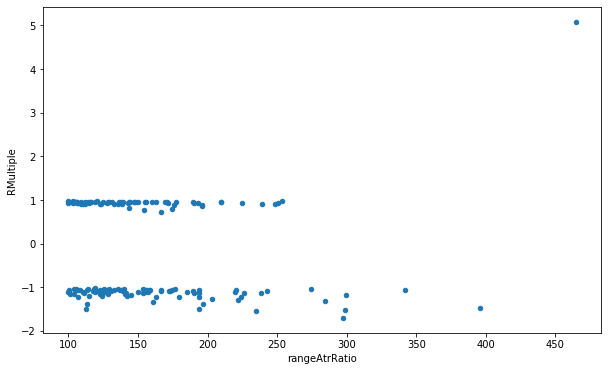

In [66]:
#winning_trades.bbMidDist.plot.hist(bins=50)
#merged_setups[merged_setups['spread'] >= 25]
merged_setups[merged_setups['rangeAtrRatio'] > 100].plot.scatter(x='rangeAtrRatio', y='RMultiple', figsize=(10,6))

3.5576202158385364

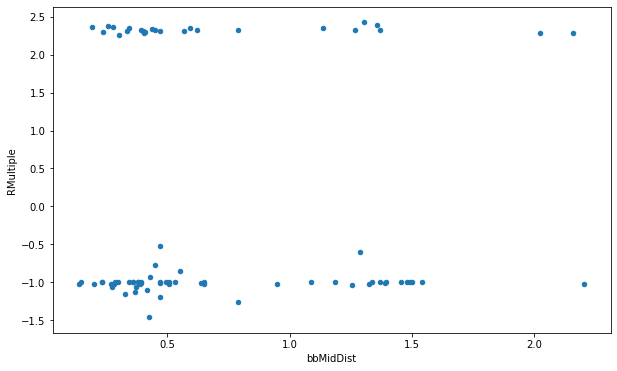

In [15]:
merged_setups.plot.scatter(x='bbMidDist', y='RMultiple', figsize=(10,6))
merged_setups[merged_setups['bbMidDist'] > 2].RMultiple.sum()

In [69]:
#losing_trades.rangeAtrRatio.plot.hist(bins=50)
losing_trades[losing_trades['RMultiple'] < -1.5].style
#losing_trades[losing_trades['bbMidDist'] >= 0.9].RMultiple.sum()

,index,BarTime,symbol,direction,entryPrice,slPrice,tpPrice,entryTime,fillPrice,closeTime,canceled,slPips,tpPips,plPips,tradeIndex,year,weekday,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value,BBMid,BBUpper,BBLower,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom,range,rangeAtrRatio,directionWickRatio
28,33,2019-01-09 15:00:00+00:00,EURUSD,Sell,1.152460,1.154220,1.150700,2019-01-09T15:00:00Z,1.152390,2019-01-09T19:01:00Z,False,17.600000,17.600000,-28.500000,28,2019,2,-1.619318,2019-01-09T15:00:00Z,1.152390,142244.000000,2019-01-09T19:01:00Z,1.155240,-405.400000,04:01:00,-602.410000,EURUSD,1.146100,1.151200,1.141100,18.600000,1.152460,1.154040,1.150865,1.151035,1.300000,0.497638,0.448819,0.053543,31.750000,1.706989,0.053543
84,95,2019-01-22 22:00:00+00:00,NZDUSD,Sell,0.674580,0.675690,0.673470,2019-01-22T22:00:00Z,0.673580,2019-01-22T22:09:00Z,False,11.100000,11.100000,-21.100000,84,2019,1,-1.900901,2019-01-22T22:00:00Z,0.673580,211785.000000,2019-01-22T22:09:00Z,0.675690,-446.870000,00:09:00,-446.870000,NZDUSD,0.672400,0.675100,0.669800,11.400000,0.674580,0.675840,0.674315,0.675340,2.400000,0.327869,0.498361,0.173770,15.250000,1.337719,0.173770
141,162,2019-02-01 15:00:00+00:00,USDJPY,Sell,109.114000,109.219000,109.008000,2019-02-01T15:00:00Z,109.104000,2019-02-01T15:01:00Z,False,10.500000,10.600000,-16.000000,141,2019,4,-1.523810,2019-02-01T15:00:00Z,109.104000,238591.000000,2019-02-01T15:01:00Z,109.264000,-349.400000,00:01:00,-349.400000,USDJPY,108.922200,109.220800,108.623700,12.400000,109.113500,109.477000,109.106500,109.363500,1.500000,0.306343,0.674764,0.018893,3705.000000,298.790323,0.018893
193,223,2019-02-12 17:00:00+00:00,EURUSD,Sell,1.131570,1.132750,1.130390,2019-02-12T17:00:00Z,1.131510,2019-02-12T18:09:00Z,False,11.800000,11.800000,-21.300000,193,2019,1,-1.805085,2019-02-12T17:00:00Z,1.131510,189956.000000,2019-02-12T18:09:00Z,1.133640,-404.610000,01:09:00,-429.300000,EURUSD,1.128600,1.131800,1.125400,11.600000,1.131570,1.132265,1.131330,1.131990,1.200000,0.294118,0.449198,0.256684,9.350000,0.806034,0.256684
214,246,2019-02-15 13:00:00+00:00,EURUSD,Buy,1.126280,1.125170,1.127380,2019-02-15T13:00:00Z,1.126340,2019-02-15T13:27:00Z,False,11.100000,11.000000,-18.800000,214,2019,4,-1.693694,2019-02-15T13:00:00Z,1.126340,199934.000000,2019-02-15T13:27:00Z,1.124460,-375.880000,00:27:00,-379.880000,EURUSD,1.128500,1.131500,1.125500,12.400000,1.126275,1.126410,1.123425,1.125275,1.300000,0.045226,0.335008,0.619765,29.850000,2.407258,0.045226
242,279,2019-02-21 02:00:00+00:00,NZDUSD,Buy,0.684350,0.683100,0.685600,2019-02-21T02:00:00Z,0.684430,2019-02-21T05:29:00Z,False,12.500000,12.500000,-20.600000,242,2019,3,-1.648000,2019-02-21T02:00:00Z,0.684430,177617.000000,2019-02-21T05:29:00Z,0.682370,-365.890000,03:29:00,-574.590000,NZDUSD,0.686400,0.688500,0.684300,12.100000,0.684350,0.684845,0.684100,0.684675,1.700000,0.228188,0.436242,0.335570,7.450000,0.615702,0.228188
336,386,2019-03-08 17:00:00+00:00,GBPUSD,Buy,1.301000,1.298450,1.303540,2019-03-08T17:00:00Z,1.301100,2019-03-10T21:01:00Z,False,25.500000,25.400000,-44.400000,336,2019,4,-1.741176,2019-03-08T17:00:00Z,1.301100,80796.000000,2019-03-10T21:01:00Z,1.296660,-358.730000,2.04:01:00,-418.520000,GBPUSD,1.307400,1.314600,1.300100,25.200000,1.300995,1.301240,1.299030,1.300995,1.900000,0.110860,0.000000,0.889140,22.100000,0.876984,0.110860
381,439,2019-03-20 15:00:00+00:00,USDCHF,Buy,0.997360,0.996620,0.998100,2019-03-20T15:00:00Z,0.997430,2019-03-20T18:01:00Z,False,7.400000,7.400000,-18.700000,381,2019,2,-2.527027,2019-03-20T15:00:00Z,0.997430,288806.000000,2019-03-20T18:01:00Z,0.995560,-542.400000,03:01:00,-723.680000,USDCHF,0.999200,1.001200,0.997100,7.800000,0.997360,0.998090,0.996830,0.997455,1.500000,0.503968,0.075397,0.420635,12.600000,1.615385,0.503968
432,501,2019-03-29 12:00:00+00:00,USDCAD,Buy,1.341740,1.340520,1.342950,2019-03-29T12:00:00Z,1.341820,2019-03-29T12:31:00Z,False,12.200000,12.100000,-52.

4.628257476431292

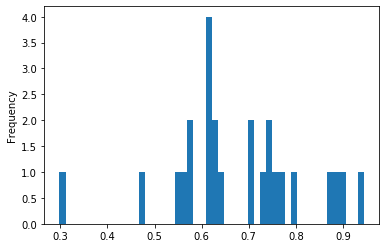

In [17]:
#winning_trades_desc
#winning_trades
winning_trades.ratioBody.plot.hist(bins=50)
winning_trades[winning_trades['ratioBody'] < 0.5].RMultiple.sum()

In [18]:
#todo: look at size relative to ATR